# Part II - How do loan amounts affect investors for prosper loans
## by Austin Mnthambala Jr.


## Investigation Overview

In this presentation, I wanted to look at the attributes of the loans that are taken out at prosper to predict the best times and highest chance of approval and funding. The main focus was on: Loan term, Yearly quarter, Loan amounts, Investors and Fiscal years.


## Dataset Overview

The data consisted of loan amounts and features of 113,937 prosper loans. The features included the loan attributes, as well as fiscal year details. Any null values where removed from used columns and categorical variables.

In [1]:
# import all packages and set plots to be embedded inline
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sb

%matplotlib inline

# suppress warnings from final output
import warnings
warnings.simplefilter("ignore")

In [2]:
loans = pd.read_csv('prosperLoanData.csv')

In [3]:
# Convert the "Term" column to a plain object type
loans['Term'] = loans['Term'].astype(str)

# Convert the "Term" column from a plain object type into an ordered categorical type
termlength = ['60', '36', '12']
pd_ver = pd.__version__.split(".")
if (int(pd_ver[0]) > 0) or (int(pd_ver[1]) >= 21): # v0.21 or later
    term_Length = pd.api.types.CategoricalDtype(ordered = True,
                                                categories = termlength)
    loans['Term'] = loans['Term'].astype(term_Length)
else: # pre-v0.21
    loans['Term'] = loans['Term'].astype('category', ordered = True,
                                         categories = termlength)

In [4]:
# dropping null values from 'LoanOriginationQuarter' column to avoid errors
loans['LoanOriginationQuarter'].dropna(inplace = True)
 
# new data frame with split value columns
loanQ = loans['LoanOriginationQuarter'].str.split(" ", n = 1, expand = True)
 
# making separate loan original quarter column from new data frame
loans["LoanOriginQuarter"]= loanQ[0]
 
# making separate fiscal quarter year column from new data frame
loans["LoanQuarterYear"]= loanQ[1]
 
# Dropping 'LoanOriginationQuarter' column
loans.drop(columns =["LoanOriginationQuarter"], inplace = True)

# Convert the "LoanOriginQuarter" column from a plain object type into an ordered categorical type
loan_quarter = ['Q4','Q3', 'Q2', 'Q1']
pd_ver = pd.__version__.split(".")
if (int(pd_ver[0]) > 0) or (int(pd_ver[1]) >= 21): # v0.21 or later
    loanQuarter = pd.api.types.CategoricalDtype(ordered = True,
                                                categories = loan_quarter)
    loans['LoanOriginQuarter'] = loans['LoanOriginQuarter'].astype(loanQuarter)
else: # pre-v0.21
    loans['LoanOriginQuarter'] = loans['LoanOriginQuarter'].astype('category', ordered = True,
                                         categories = loan_quarter)

In [5]:
# dropping null value rows to avoid errors
loans.dropna(subset=['Term', 'LoanOriginalAmount', 'Investors'], inplace = True)

## Distribution of Loan Amounts

Loan Amounts in the loan dataset are spread across a large range, from about 1,000 at the lowest, to about 35,000 at the highest. Plotted on a logarithmic scale, the distribution of loan amounts takes on a multimodal non-skewed shape and adjusted ticks. 

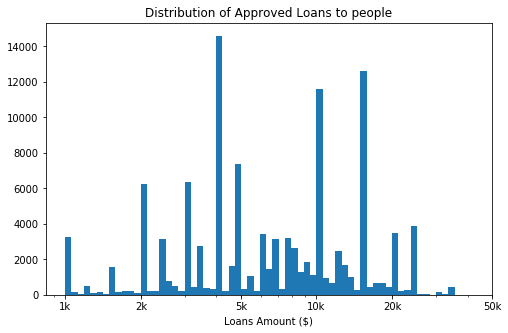

In [6]:
# using a log scale since our values go in excess of 30,000 and a tail was forming towards the end.
log_binsize = 0.025
bins = 10 ** np.arange(3, np.log10(loans['LoanOriginalAmount'].max())+log_binsize, log_binsize)

plt.figure(figsize=[8, 5])
plt.hist(data = loans, x = 'LoanOriginalAmount', bins = bins)
plt.xscale('log')
plt.xticks([1e3, 2e3, 5e3, 1e4, 2e4, 5e4], ['1k', '2k', '5k', '10k', '20k', '50k'])
plt.xlabel('Loans Amount ($)')
plt.title('Distribution of Approved Loans to people')
plt.show()

## Distribution of Investors

Investors distribution is bundled around the 0 to 500, the scale is from about 1 at the lowest, to about 1,189 at the highest. Plotted on a logarithmic scale, the distribution of investors takes on a unimodal right skewed shape and adjusted ticks. 

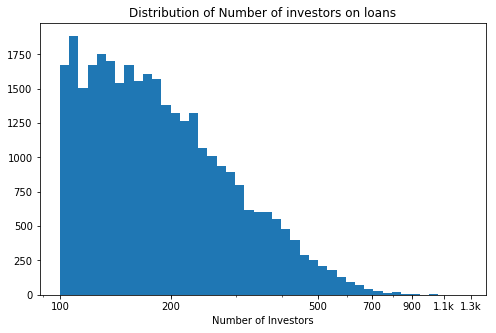

In [7]:
# there's a long tail in the standard, so let's put it on a log scale to get a better idea of the values
log_binsize = 0.025
bins = 10 ** np.arange(2, np.log10(loans['Investors'].max())+log_binsize, log_binsize)

plt.figure(figsize=[8, 5])
plt.hist(data = loans, x = 'Investors', bins = bins)
plt.xscale('log')
plt.xticks([100, 200, 500, 700, 900, 1100, 1300], ['100', '200', '500', '700', '900', '1.1k', '1.3k'])
plt.xlabel('Number of Investors')
plt.title('Distribution of Number of investors on loans')
plt.show()

## Loan Amount vs. Investors

Plotting loan amounts and investors produces an approximately linear relationship. For loan amounts above 16,000, there appears to be a drastic drop in the number of investors funding: based on the trend above the 200 investor funded loans, there's a huge decrease of the amount of cases where the loans were funded by that many investors.

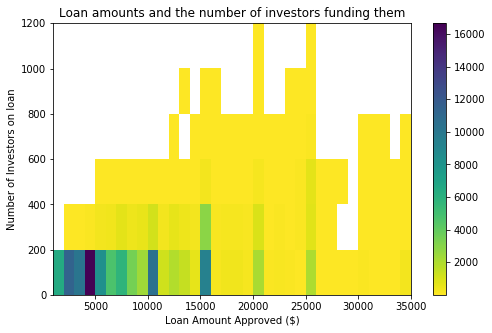

In [8]:
# create heat maps on spread of investors across loan amounts
plt.figure(figsize = [8, 5])

bins_x = np.arange(1000, 35000+1000, 1000)
bins_y = np.arange(1, 1200+200, 200)

h2d = plt.hist2d(data = loans, x = 'LoanOriginalAmount', y = 'Investors', cmin=1, cmap='viridis_r', bins = [bins_x, bins_y])
plt.colorbar()
plt.xlabel('Loan Amount Approved ($)')
plt.ylabel('Number of Investors on loan')
plt.title('Loan amounts and the number of investors funding them');

In [9]:
def hist2dgrid(x, y, **kwargs):
    """ Quick hack for creating heat maps with seaborn's PairGrid. """
    palette = kwargs.pop('color')
    bins_x = np.arange(1000, 35000+1000, 1000)
    bins_y = np.arange(1, 1200+200, 200)
    plt.hist2d(x, y, bins = [bins_x, bins_y], cmap = palette, cmin = 1)

## Loan Amounts by Investors and Fiscal year

We can see how loans were funded over the years by plotting the distribution of points for different cases of investor funding. Through the years the financing of loans has been steady diversifying and spreading out, with 2005 having mostly loans under the value of 10,000 being funded and only less than a 1,000 loan amount having more than 2000 cases of being funded. as we move through the years we see a gradual spread of loan funding for 600 to 10000 investor cases it reaches it's max in 2013 where there were 1200 invesor funded loans from here the distribution becomes more uniformly spread out with higher loan amounts having more cases of 200 investor loan funding. Showing a negative coorelation between the two,as loan amount increases the chance of investor funding decreases.

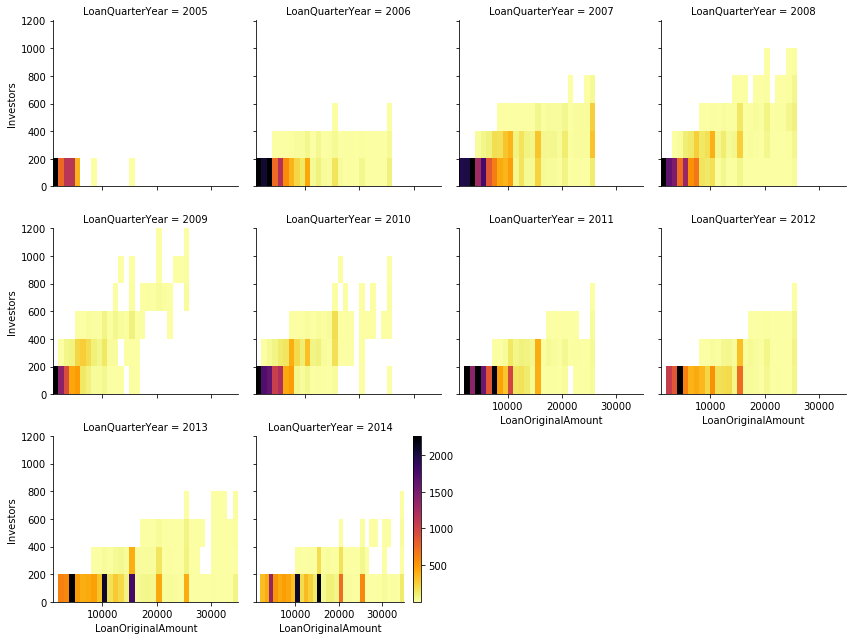

In [10]:
# create heat maps on spread of investors across loan amounts in each fiscal quarter
g = sb.FacetGrid(data = loans, col = 'LoanQuarterYear',col_wrap=4, size = 3,
                margin_titles = True)
g.map(hist2dgrid, 'LoanOriginalAmount', 'Investors', color = 'inferno_r')


plt.colorbar()

### Generate Slideshow
Once you're ready to generate your slideshow, use the `jupyter nbconvert` command to generate the HTML slide show.  

In [ ]:
# Use this command if you are running this file in local
!jupyter nbconvert Part_II_slide_deck_template.ipynb --to slides --post serve --no-input --no-prompt

### Submission
If you are using classroom workspace, you can choose from the following two ways of submission:

1. **Submit from the workspace**. Make sure you have removed the example project from the /home/workspace directory. You must submit the following files:
   - Part_I_notebook.ipynb
   - Part_I_notebook.html or pdf
   - Part_II_notebook.ipynb
   - Part_I_slides.html
   - README.md
   - dataset (optional)


2. **Submit a zip file on the last page of this project lesson**. In this case, open the Jupyter terminal and run the command below to generate a ZIP file. 
```bash
zip -r my_project.zip .
```
The command abobve will ZIP every file present in your /home/workspace directory. Next, you can download the zip to your local, and follow the instructions on the last page of this project lesson.
